<a href="https://colab.research.google.com/github/Henrikkjerstad/Final-Project/blob/main/Final%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Preparation
In this section, we load the "California Housing Prices" dataset, handle missing values, create new features, and drop the variables we don't need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
data = pd.read_csv(url)

# Data cleaning and feature engineering
data = data.dropna()
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data = data.drop(columns=['ocean_proximity', 'population', 'households', 'longitude', 'latitude'])

# Data Splitting and Scaling
We split the data into training and testing sets and standardize the features to ensure they have zero mean and unit variance.

In [ ]:
# Split data
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
We initialize and train three models: Linear Regression, Random Forest, and Gradient Boosting on the training data.

In [ ]:
# Initialize models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train models
lin_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)

# Model Evaluation
We predict house prices on the test data and calculate the Mean Squared Error (MSE) and R² scores for each model. These metrics help us evaluate the performance of the models.



In [ ]:
# Predict and evaluate
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Linear Regression MSE: {mse_lin}, R²: {r2_lin}')
print(f'Random Forest MSE: {mse_rf}, R²: {r2_rf}')
print(f'Gradient Boosting MSE: {mse_gb}, R²: {r2_gb}')

# Feature Correlation Heatmap
We visualize the correlation between different features in the dataset using a heatmap. This helps in understanding the relationships between variables and identifying potential multicollinearity.

In [ ]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution of House Prices
We plot the distribution of house prices to understand the range and frequency of house prices in the dataset. This histogram shows that most houses are priced below 200,000, with a significant number at 500,000, indicating a price ceiling in the dataset.

In [ ]:
# Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

# Actual vs Predicted Prices (Gradient Boosting)
We visualize the relationship between actual house prices and the prices predicted by the Gradient Boosting model. Points close to the red line represent accurate predictions.

In [ ]:
# Actual vs Predicted Prices (Gradient Boosting)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.show()

# Visualizing Model Performance
We compare the performance of the three models (Linear Regression, Random Forest, and Gradient Boosting) using bar plots for Mean Squared Error (MSE) and R² scores. Lower MSE and higher R² indicate better model performance.

In [ ]:
# Visualizing Model Predictions
# Model performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_values = [mse_lin, mse_rf, mse_gb]
r2_values = [r2_lin, r2_rf, r2_gb]

# Bar plot for Mean Squared Error (MSE)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.ylabel('MSE (Lower is Better)')
plt.xlabel('Models')
plt.xticks(rotation=15)

# Bar plot for R² Score
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score (Higher is Better)')
plt.xlabel('Models')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# User Input for House Price Prediction
In this section, we ask the user for details about their house and use the Linear Regression, Random Forest, and Gradient Boosting models to predict the house price based on the user's input.

In [ ]:
# Function to predict house price based on user input
def predict_house_price():
    # Input details about the house
    housing_median_age = float(input("Enter house median age in the area: "))
    total_rooms = float(input("Enter total rooms: "))
    total_bedrooms = float(input("Enter total bedrooms: "))
    median_income = float(input("Enter median income in the area: "))

    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'housing_median_age': [housing_median_age],
        'total_rooms': [total_rooms],
        'total_bedrooms': [total_bedrooms],
        'median_income': [median_income],
        'rooms_per_household': [total_rooms / 1],  # Assuming single household for calculation
        'bedrooms_per_room': [total_bedrooms / total_rooms]
    })

    # Standardize the user input data
    user_data_scaled = scaler.transform(user_data)

    # Predict house price using the Gradient Boosting model
    predicted_price_gb = gb_reg.predict(user_data)

    print(f"The predicted house price using Gradient Boosting is: ${predicted_price_gb[0]:,.2f}")

# Call the function to get user input and predict house price
predict_house_price()

# Complete Code


Linear Regression MSE: 6044629692.576626, R²: 0.557985390676275
Random Forest MSE: 5175597081.5651455, R²: 0.6215335531911033
Gradient Boosting MSE: 5012024196.270121, R²: 0.6334948491954603


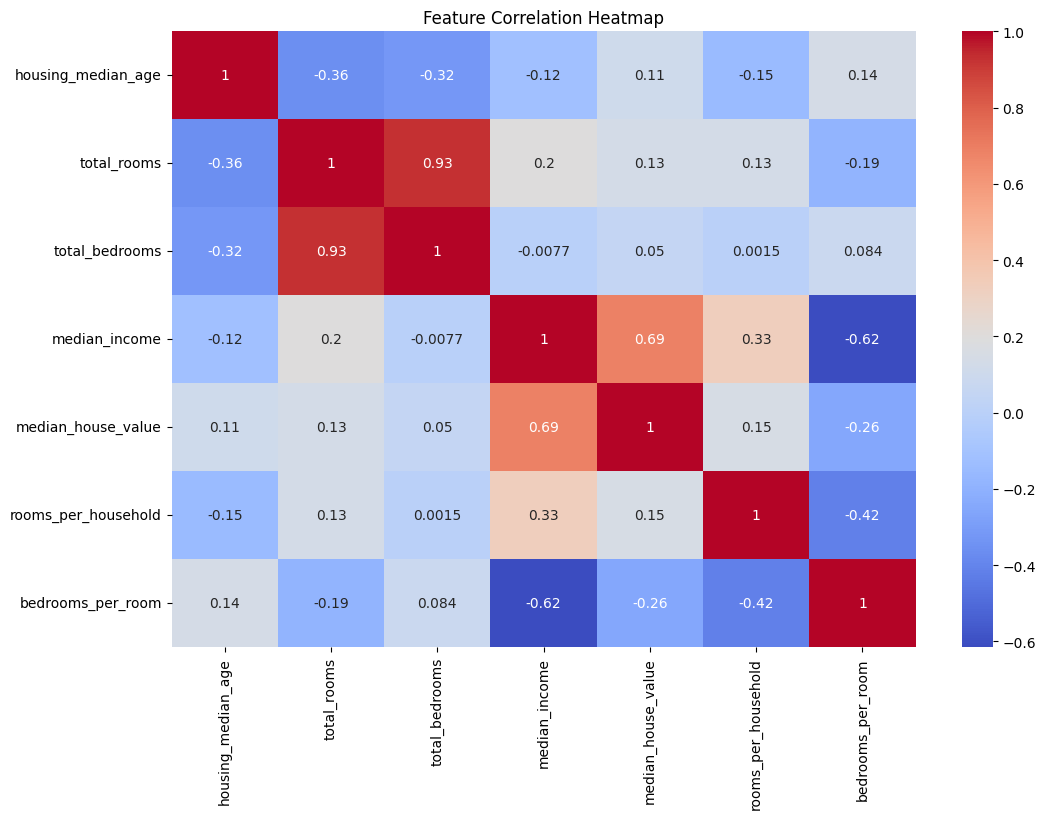

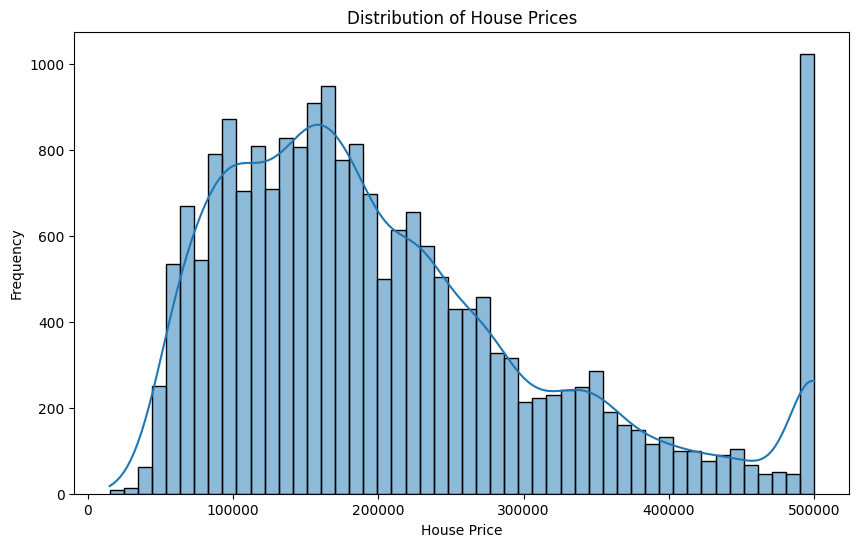

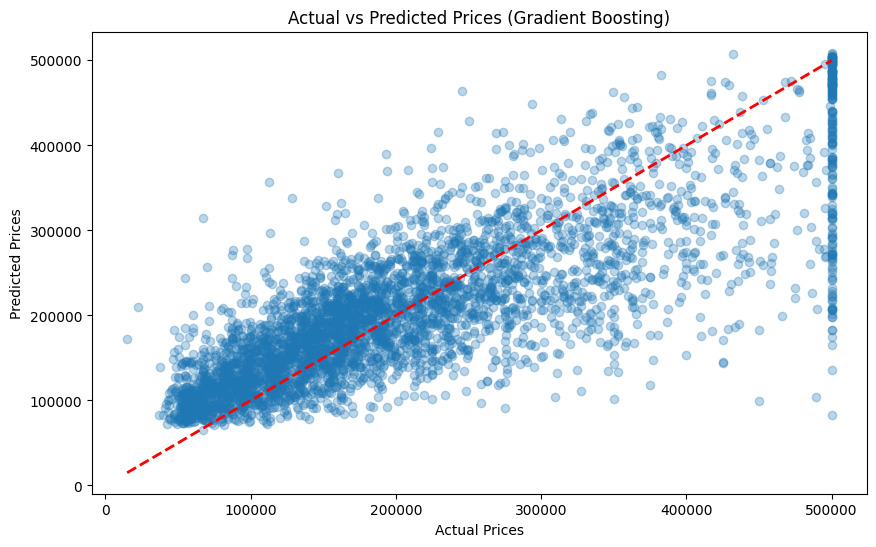

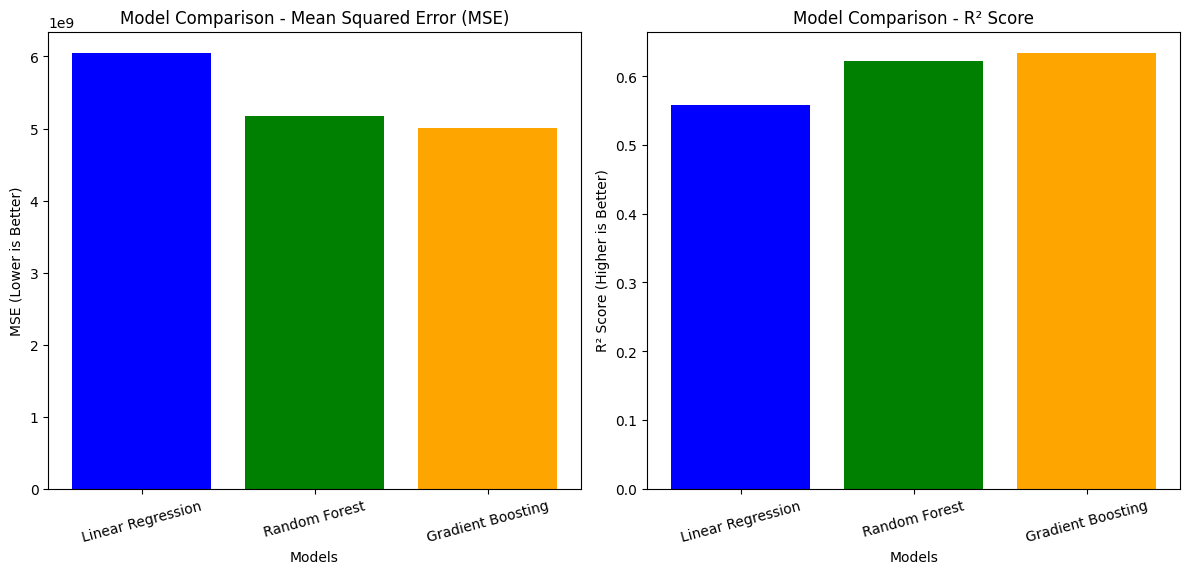

Enter house median age in the area: 20
Enter total rooms: 10
Enter total bedrooms: 3
Enter median income in the area: 15000
The predicted house price using Gradient Boosting is: $322,157.24


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
data = pd.read_csv(url)

# Data cleaning and feature engineering
data = data.dropna()
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data = data.drop(columns=['ocean_proximity', 'population', 'households', 'longitude', 'latitude'])

# Split data
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train models
lin_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Linear Regression MSE: {mse_lin}, R²: {r2_lin}')
print(f'Random Forest MSE: {mse_rf}, R²: {r2_rf}')
print(f'Gradient Boosting MSE: {mse_gb}, R²: {r2_gb}')

# Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

# Actual vs Predicted Prices (Gradient Boosting)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.show()

# Visualizing Model Predictions
# Model performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_values = [mse_lin, mse_rf, mse_gb]
r2_values = [r2_lin, r2_rf, r2_gb]

# Bar plot for Mean Squared Error (MSE)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.ylabel('MSE (Lower is Better)')
plt.xlabel('Models')
plt.xticks(rotation=15)

# Bar plot for R² Score
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score (Higher is Better)')
plt.xlabel('Models')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# Function to predict house price based on user input
def predict_house_price():
    # Input details about the house
    housing_median_age = float(input("Enter house median age in the area: "))
    total_rooms = float(input("Enter total rooms: "))
    total_bedrooms = float(input("Enter total bedrooms: "))
    median_income = float(input("Enter median income in the area: "))

    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'housing_median_age': [housing_median_age],
        'total_rooms': [total_rooms],
        'total_bedrooms': [total_bedrooms],
        'median_income': [median_income],
        'rooms_per_household': [total_rooms / 1],  # Assuming single household for calculation
        'bedrooms_per_room': [total_bedrooms / total_rooms]
    })

    # Standardize the user input data
    user_data_scaled = scaler.transform(user_data)

    # Predict house price using the Gradient Boosting model
    predicted_price_gb = gb_reg.predict(user_data)

    print(f"The predicted house price using Gradient Boosting is: ${predicted_price_gb[0]:,.2f}")

# Call the function to get user input and predict house price
predict_house_price()